In [105]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
import os
import glob
from scipy.ndimage import gaussian_filter
import scipy.ndimage
from gpi_analysis.analysis import radialprofile
from gpi_analysis.analysis import make_radialstokes

In [106]:
def shift(arr_in,dx, dy):
    """
    Shift array i from the original list by an amount [dy, dx]
    Use bicubic spline interpolation
    """

    y = np.arange(arr_in.shape[0])
    x = np.arange(arr_in.shape[1])
    x, y = np.meshgrid(x, y)

    inarr = np.nan_to_num(arr_in.copy())
    #plt.imshow(inarr)
    #plt.show()
    #plt.close
    outarr = scipy.ndimage.map_coordinates(inarr, [y + dy, x + dx])
    #plt.imshow(outarr-arr_in,origin='lower')
    #plt.plot(140.0,140.0,'x',color='w',ms=12)
    #plt.show()
    #plt.close
    #outarr[outarr< 1e-3] = 0.0
    return outarr

In [107]:
#Load the data and create bootstrap file
directory = '/Users/earich/work_reduction/Reduced/FUOri-J/20180103/'
files = glob.glob(directory + '*podc_rstokesdc.fits')
itterations = 100
for i in range(0,len(files)):
    hdul = fits.open(files[i])
    images = hdul['Sci'].data
    if i == 0:
        data = np.zeros((4,len(images[0,:,0]),len(images[0,0,:]),len(files)))
    data[:,:,:,i] = images[:,:,:]
    hdul.close()


np.random.seed(100)
output = np.zeros((4,len(data[0,:,0,0]),len(data[0,0,:,0]),itterations))
hold = np.zeros((4,len(data[0,:,0,0]),len(data[0,0,:,0]),len(files)))
test = np.zeros
for z in range(0,itterations):
    for i in range(0,len(files)):
        sel = int(np.random.rand()*len(files))
        hold[:,:,:,i] = data[:,:,:,sel]
    output[:,:,:,z] = np.mean(hold,axis=3)
    hdul2 = fits.PrimaryHDU(output[:,:,:,z])
    hdul2.writeto(directory + 'BS1000_stokesdc/FUOri_stokesdc_BS_mean_' + str(z) + '.fits',overwrite=True)


In [ ]:
#testing individual BS frames

output1 = gaussian_filter(data[1,:,:,0],2.1)
output2 = gaussian_filter(data[1,:,:,1],2.1)

plt.imshow((output1 - output2)/output1,origin='lower',vmin=-1,vmax=1)
plt.colorbar()
plt.show()
plt.close()

print(np.nanmean(output[1,:,:67]))
print(np.nanmean(output[1,:,:,98]))


In [108]:
#read in bootstrap files and create analysis images

#Make SNR map
error = np.zeros((3,len(output[0,:,0,0]),len(output[0,0,:,0])))
img = np.zeros((3,len(output[0,:,0,0]),len(output[0,0,:,0])))
for i in range(len(output[0,:,0,0])):
    for j in range(len(output[0,0,:,0])):
        error[0,i,j] = np.nanstd(output[0,i,j,:])
        error[1,i,j] = np.nanstd(output[1,i,j,:])
        error[2,i,j] = np.nanstd(output[2,i,j,:])
        img[0,i,j] = np.nanmean(output[0,i,j,:])
        img[1,i,j] = np.nanmean(output[1,i,j,:])
        img[2,i,j] = np.nanmean(output[2,i,j,:])

/usr/local/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: Mean of empty slice
  # This is added back by InteractiveShellApp.init_path()
/usr/local/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: Mean of empty slice
  if sys.path[0] == '':
/usr/local/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: Mean of empty slice
  del sys.path[0]


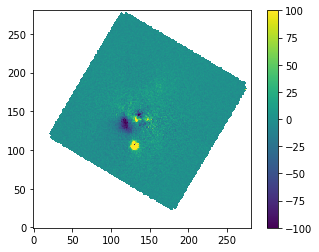

/usr/local/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys


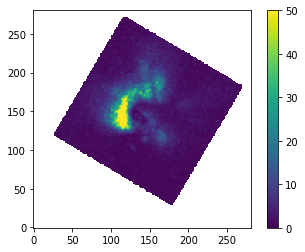

In [113]:
#plot the above created bootstrapped files and SNR maps
plt.imshow(img[2,:,:],origin='lower',vmin=-100,vmax=100)
plt.colorbar()
plt.show()
plt.close()
        
plt.imshow(gaussian_filter(np.abs(img[1,:,:])/error[1,:,:],1.0),origin='lower', vmin = 0, vmax = 50)
plt.colorbar()
plt.show()
plt.close()

hdul2 = fits.PrimaryHDU(img)
hdul2.writeto(directory + 'BS1000_stokesdc/FUOri_stokesdc_BS100.fits',overwrite=True)


/usr/local/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in true_divide


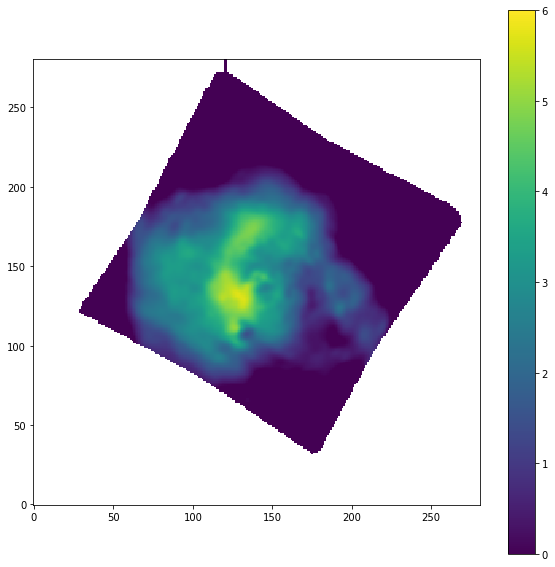

In [104]:
#Load BS combined and combined rstokesdc files created form the pypeline and plot them 
#directory = '/Users/earich/work_reduction/Reduced/FUOri-J/20180103/'
directory = '/Users/earich/work_reduction/Reduced/190820/FUOri-J/'
#directory = '/Users/earich/work_reduction/Reduced/190821/FUOri-J/'
hdul = fits.open(directory + 'FUOri-J_S20180103S0167_combined_stokesdc.fits')
BSimages = hdul['Sci'].data
hdul.close()
directory = '/Users/earich/work_reduction/masking_practice/'
hdul = fits.open(directory + 'FUOri-J_S20180103S0179_combined_stokesdc.fits')
Rimages = hdul['Sci'].data
hdul.close()
#Rimage = gaussian_filter(Rimages[1,:,:],2.1)

#Rimage = shift(Rimages[0,:,:],0.5, 1.0)
BSimage = shift(BSimages[0,:,:],-0.25, -0.6)
#BSimage = BSimages[2,:,:]
Rimage= Rimages[0,:,:] 
imgG = img[2,:,:]
BSimage = gaussian_filter(BSimage,2.1)
Rimage = gaussian_filter(Rimage,2.1)
fig = plt.figure(figsize=(10,10))
plt.imshow((np.abs(Rimage)-np.abs(BSimage))/np.abs(BSimage)*100, origin='lower',vmin=0,vmax=6)
plt.colorbar()
plt.show()

In [ ]:
directory = '/Users/earich/work_reduction/Reduced/190813/FUOri-J/'
files = glob.glob(directory + 'FUOri_rstokesdc_BS_*.fits')
for i in range(0,len(files)):
    hdul = fits.open(files[i])
    images = hdul['Sci'].data
    if i == 0:
        data = np.zeros((3,len(images[0,:,0]),len(images[0,0,:]),len(files)))
    data[:,:,:,i] = images[:3,:,:]
    hdul.close()

error = np.zeros((3,len(output[0,:,0,0]),len(output[0,0,:,0])))
img = np.zeros((3,len(output[0,:,0,0]),len(output[0,0,:,0])))
for i in range(len(output[0,:,0,0])):
    for j in range(len(output[0,0,:,0])):
        error[0,i,j] = np.nanstd(data[0,i,j,:])
        error[1,i,j] = np.nanstd(data[1,i,j,:])
        error[2,i,j] = np.nanstd(data[2,i,j,:])
        img[0,i,j] = np.nanmedian(data[0,i,j,:])
        img[1,i,j] = np.nanmedian(data[1,i,j,:])
        img[2,i,j] = np.nanmedian(data[2,i,j,:])

In [ ]:
plt.imshow(img[1,:,:],origin='lower',vmin=-100,vmax=100)
plt.colorbar()
plt.show()
plt.close()
        
plt.imshow(gaussian_filter(np.abs(img[1,:,:])/error[1,:,:],0.5),origin='lower',vmin=0.0,vmax=1)
plt.colorbar()
plt.show()
plt.close()

snr = np.abs(img[0,:,:])/np.sqrt(error[0,:,:])
print(np.mean(snr[70:80,125:135]),np.std(snr[70:80,125:135]))

In [ ]:
a = np.random.normal(200.0, 10.0, (500,500))
reduced = a - np.nanmedian(a)
plt.imshow(gaussian_filter(np.abs(reduced)/np.nanstd(a),1),origin='lower',vmin=-0.5,vmax=0.5)
plt.colorbar()
plt.show()
plt.close()
print(np.nanmean(np.abs(reduced)),np.nanstd(reduced),np.nanmedian(np.abs(reduced))/np.nanstd(a*3.))

In [ ]:
directory = '/Users/earich/work_reduction/Reduced/FUOri-J/20180103/'
files = glob.glob(directory + 'FUOri_rstokesdc_BS_*.fits')
for i in range(0,len(files)):
    hdul = fits.open(files[i])
    images = hdul['Sci'].data
    if i == 0:
        data = np.zeros((3,len(images[0,:,0]),len(images[0,0,:]),len(files)))
    data[:,:,:,i] = images[:3,:,:]
    hdul.close()

error = np.zeros((3,len(data[0,:,0,0]),len(data[0,0,:,0])))
img = np.zeros((3,len(data[0,:,0,0]),len(data[0,0,:,0])))
for i in range(len(data[0,:,0,0])):
    for j in range(len(data[0,0,:,0])):
        error[0,i,j] = np.nanstd(data[0,i,j,:])
        error[1,i,j] = np.nanstd(data[1,i,j,:])
        error[2,i,j] = np.nanstd(data[2,i,j,:])

In [4]:
directory = '/Users/earich/work_reduction/Reduced/FUOri-J/20180103/'
#directory = '/Users/earich/work_reduction/Reduced/190815/FUOri-J/'
fig, ax = plt.subplots(1)
hdul = fits.open(directory + 'FUOri-J_S20180103S0167_combined_rstokesdc.fits')
#hdul = fits.open('/Users/earich/work_reduction/masking_practice/FUOri-J_S20180103S0179_combined_rstokesdc.fits')
image = hdul['Sci'].data
header = hdul['Sci'].header
ITIME = float(header['ITIME'])
#print(float(header['CALIBFAC'])*1000./0.01414/0.01414*ITIME)
hdul.close()
#print(header['SATSORDR'],header['CALIBFAC'],header['CALIBERR'])

Fscale = 3.0 #6.4
scale = 0.01414
Rbins, Qbins = radialprofile(image[0],SMOOTH=1)
#Rbins, EQbins = radialprofile(error[0,:,:], ERROR = True)
#Rbins, Qbins, EQbins = np.array(Rbins)*scale, np.array(Qbins), np.array(EQbins)
Rbins, Qbins = np.array(Rbins)*scale, np.array(Qbins)*Fscale/ITIME
plt.plot(Rbins,Qbins,'-', color='b', label='I')
#ax.fill_between(Rbins, Qbins-EQbins,Qbins+EQbins,color='b', alpha=0.1)
Rbins, Qbins = radialprofile(image[1],SMOOTH=1)
#Rbins, EQbins = radialprofile(error[1,:,:], ERROR=True)
#Rbins, Qbins, EQbins = np.array(Rbins)*scale, np.array(Qbins), np.array(EQbins)
Rbins, Qbins = np.array(Rbins)*scale, np.array(Qbins)*Fscale/ITIME
plt.plot(Rbins[1:],Qbins[1:],'--', color='r', label='Q$_\phi$')
#ax.fill_between(Rbins, Qbins-EQbins,Qbins+EQbins,color='r', alpha=0.1)
Rbins, Qbins = radialprofile(np.abs(image[2]),SMOOTH=1)
#Rbins, EQbins = radialprofile(np.abs(error[2,:,:]), ERROR = True)
#Rbins, Qbins, EQbins = np.array(Rbins)*scale, np.array(Qbins), np.array(EQbins)
Rbins, Qbins = np.array(Rbins)*scale, np.array(Qbins)*Fscale/ITIME
plt.plot(Rbins[1:],Qbins[1:],'-.', color='g', label='U$_\phi$')
#ax.fill_between(Rbins, Qbins-EQbins,Qbins+EQbins,color='g', alpha=0.1)
plt.yscale("log")
plt.xlabel(r'Radial Distance (")')
plt.ylabel("Surface Brightness (mJy/arcsec$^2$)")
plt.title('FU Ori-J Masked Reduction')
plt.legend(loc=1)
#plt.show()
plt.savefig(directory + 'FUOri-J_EAR_comb_radial_prof.png',dpi=150)
plt.close()

In [ ]:
directory = '/Users/earich/work_reduction/masking_practice/'
hdul = fits.open(directory + 'FUOri-J_S20180103S0187_combined_stokesdc.fits')
images = hdul['Sci'].data
i,q,u,v = images
qphi,uphi = make_radialstokes(q,u)

In [ ]:
scale = 0.01414
Rbins, Qbins = radialprofile(i)
Rbins, EQbins = radialprofile(error[0,:,:], ERROR = True)
Rbins, Qbins, EQbins = np.array(Rbins)*scale, np.array(Qbins), np.array(EQbins)
plt.plot(Rbins,Qbins,'-', color='b', label='I')
#ax.fill_between(Rbins, Qbins-EQbins,Qbins+EQbins,color='b', alpha=0.1)
Rbins, Qbins = radialprofile(qphi)
Rbins, EQbins = radialprofile(error[1,:,:], ERROR=True)
Rbins, Qbins, EQbins = np.array(Rbins)*scale, np.array(Qbins), np.array(EQbins)
plt.plot(Rbins,Qbins,'--', color='r', label='Q$_\phi$')
#ax.fill_between(Rbins, Qbins-EQbins,Qbins+EQbins,color='r', alpha=0.1)
Rbins, Qbins = radialprofile(np.abs(uphi))
Rbins, EQbins = radialprofile(np.abs(error[2,:,:]), ERROR = True)
Rbins, Qbins, EQbins = np.array(Rbins)*scale, np.array(Qbins), np.array(EQbins)
plt.plot(Rbins,Qbins,'-.', color='g', label='U$_\phi$')
#ax.fill_between(Rbins, Qbins-EQbins,Qbins+EQbins,color='g', alpha=0.1)
plt.yscale("log")
plt.xlabel(r'Radial Distance (")')
plt.ylabel("Flux (counts)")
plt.legend(loc=1)
#plt.savefig(directory + 'FUOri-J_Laws_radial_prof.png',dpi=150)
plt.show()
plt.close()

directory2 = '/Users/earich/work_reduction/Reduced/190815/FUOri-J/'
hdul = fits.open('/Users/earich/work_reduction/Reduced/FUOri-J/20180103/FUOri-J_S20180103S0167_combined_rstokesdc.fits')
#hdul = fits.open(directory2 + 'FUOri-J_S20180103S0167_combined_rstokesdc.fits')
ALimages = hdul['Sci'].data
hdul.close()
#hdul = fits.open(directory2 + 'FUOri-J_S20180103S0167_combined_rstokesdc.fits')
hdul = fits.open('/Users/earich/work_reduction/Reduced/FUOri-J/20180103/FUOri-J_S20180103S0167_BScombined_rstokesdc.fits')
Rimages = hdul['Sci'].data
hdul.close()

simage = gaussian_filter(np.copy(Rimages[1,:,:]),2.1)
#simage = shift(simage,-0.25, -0.56)/Users/earich/work_reduction/Reduced/FUOri-J/20180103/FUOri-J_S20180103S0167_BScombined_rstokesdc.fits
#simage = shift(simage,-0.7, -1.0)

Rimage = gaussian_filter(Rimages[1,:,:],2.1)
ALimage = gaussian_filter(ALimages[1,:,:],2.1)
plt.imshow((simage - ALimage)/simage, origin='lower',vmin=-0.3,vmax=0.3)
plt.colorbar()
plt.show()
plt.close()

plt.imshow((Rimage - ALimage)/Rimage, origin='lower',vmin=-0.3,vmax=0.3)
plt.colorbar()
plt.show()
plt.close()

In [ ]:
a = ([1.0,10.2,10.5,11.1,10.9,12.3,9.5])
print(np.mean(a[:]),np.std(a[:]))

In [ ]:
b = np.zeros((500))
for i in range(0,500):
    np.random.seed()
    rand = int(np.random.rand()*len(a))
    b[i] = a[rand]
print(np.mean(b),np.std(b))